   Wavelength        I  Incrament  Unnamed: 3  Ambient air
0   409.50000  0.40394    0.00005         NaN          NaN
1   409.50005  0.40406        NaN         NaN          NaN
2   409.50010  0.40406        NaN         NaN          NaN
3   409.50015  0.40422        NaN         NaN          NaN
4   409.50020  0.40421        NaN         NaN          NaN


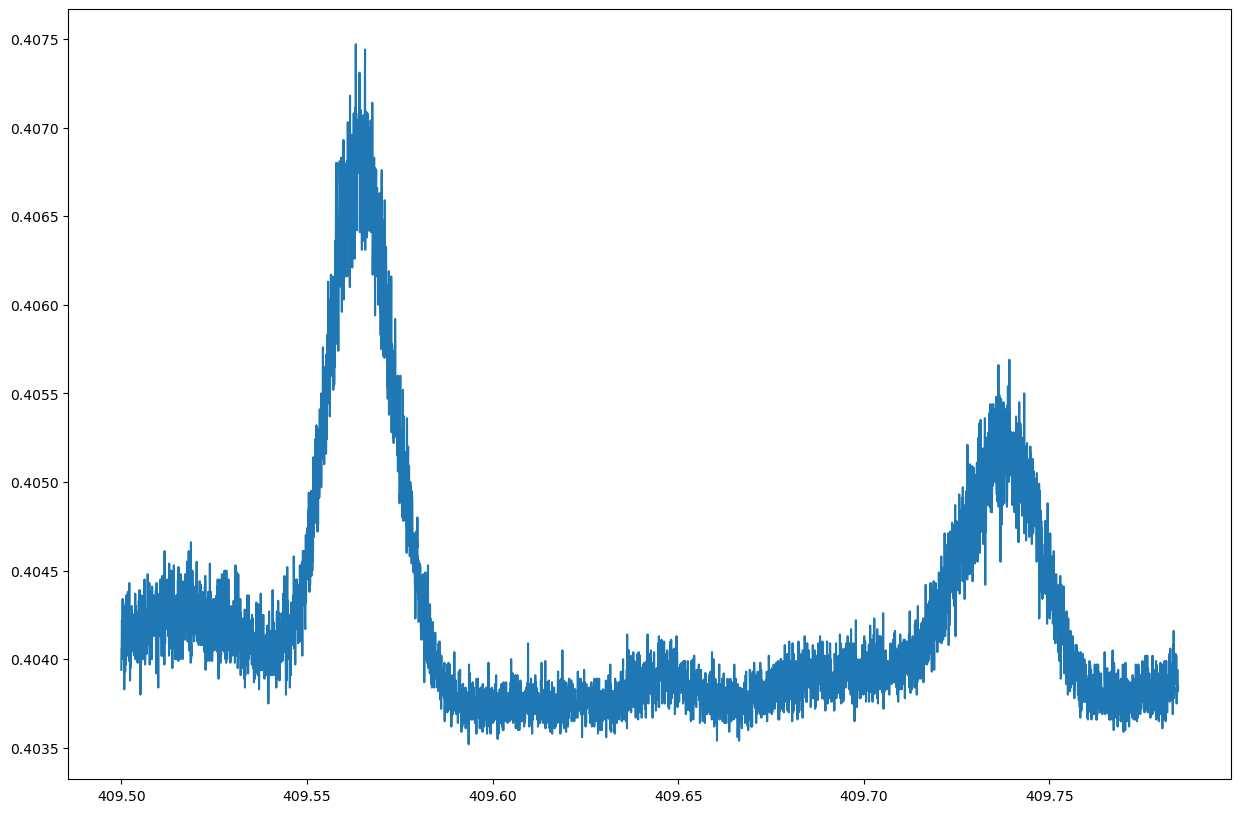

In [1]:
###################
# Import Libraries
###################

import pandas as pd # coding but excel
import numpy as np # number stuff, creates arrays
import matplotlib.pyplot as plt # plotting
from scipy.optimize import curve_fit # curve fit class


##############
# Import data
##############

df_H2D2 = pd.read_csv("H2D2_Spectra_410.csv") # create pandas dataframe
print(df_H2D2.head()) # print first 5 rows


##############
# Plot data
##############

x_H2D2 = df_H2D2["Wavelength"] # grab column
y_H2D2 = df_H2D2["I"] # grab column
plt.figure(figsize=(15,10))
plt.plot(x_H2D2, y_H2D2)
plt.show()

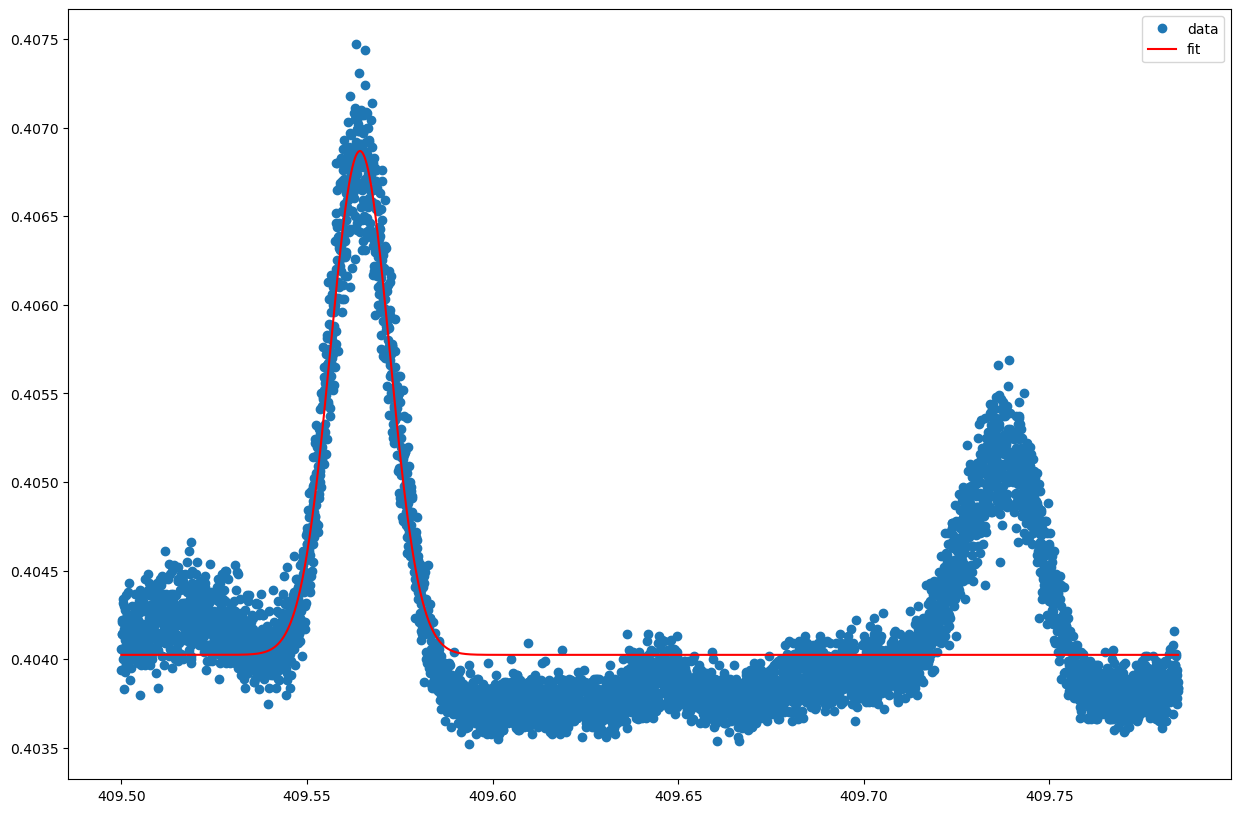

In [2]:
########################
# Input constant values
########################

a_H2 = 0.002 # amplitude                   
mean_H2 = 409.55 # middle of graph                 
h_H2 = .403 # vertical shift                  
sigma_H2 = 0.025 # width displacement


################################
# Define the Gaussian function
# takes in constants, solves 
# equation, returns value
################################

def gaus(x_H2D2, a_H2, mean_H2, sigma_H2, h_H2):
    fit = a_H2*np.exp((-(x_H2D2-mean_H2)**2)/(2*sigma_H2**2)) + h_H2
    return fit


#####################
# Fit the data using
# curve fit class
#####################

popt_H2, pcov_H2 = curve_fit(gaus, x_H2D2, y_H2D2, p0=[a_H2, mean_H2, sigma_H2, h_H2]) # solves for a, mean, sigma, h
y_H2_fit = gaus(x_H2D2, *popt_H2) # creates y(x) = gaus function with fitted values


#################
# Plot Fit Curve
#################

plt.figure(figsize=(15,10))
plt.plot(x_H2D2, y_H2D2, 'o', label="data")
plt.plot(x_H2D2, y_H2_fit, 'r-', label='fit')
plt.legend()
plt.show()

In [3]:
#####################
# Print fit data
# Print uncertainty
#####################
print("Fit Amplitude: ", popt_H2[0],
      "\n Fit Mean (Wavelength): ", popt_H2[1],
      "\n Fit Sigma (distance from mean to sides): ", popt_H2[2],
      "\n Fit Height: ", popt_H2[3])

print("\n Uncertainty matrix (uncertainties lie along diagonal): \n", pcov_H2)

Fit Amplitude:  0.0028431226390420996 
 Fit Mean (Wavelength):  409.5642773103868 
 Fit Sigma (distance from mean to sides):  0.007963904501357772 
 Fit Height:  0.4040246014286054

 Uncertainty matrix (uncertainties lie along diagonal): 
 [[ 6.70411007e-10  9.40974582e-13 -1.15632643e-09 -1.80535039e-11]
 [ 9.40974582e-13  6.87708628e-09 -2.63548041e-12  6.83059865e-18]
 [-1.15632643e-09 -2.63548041e-12  7.27756393e-09 -1.01118002e-10]
 [-1.80535039e-11  6.83059865e-18 -1.01118002e-10  2.55315100e-11]]


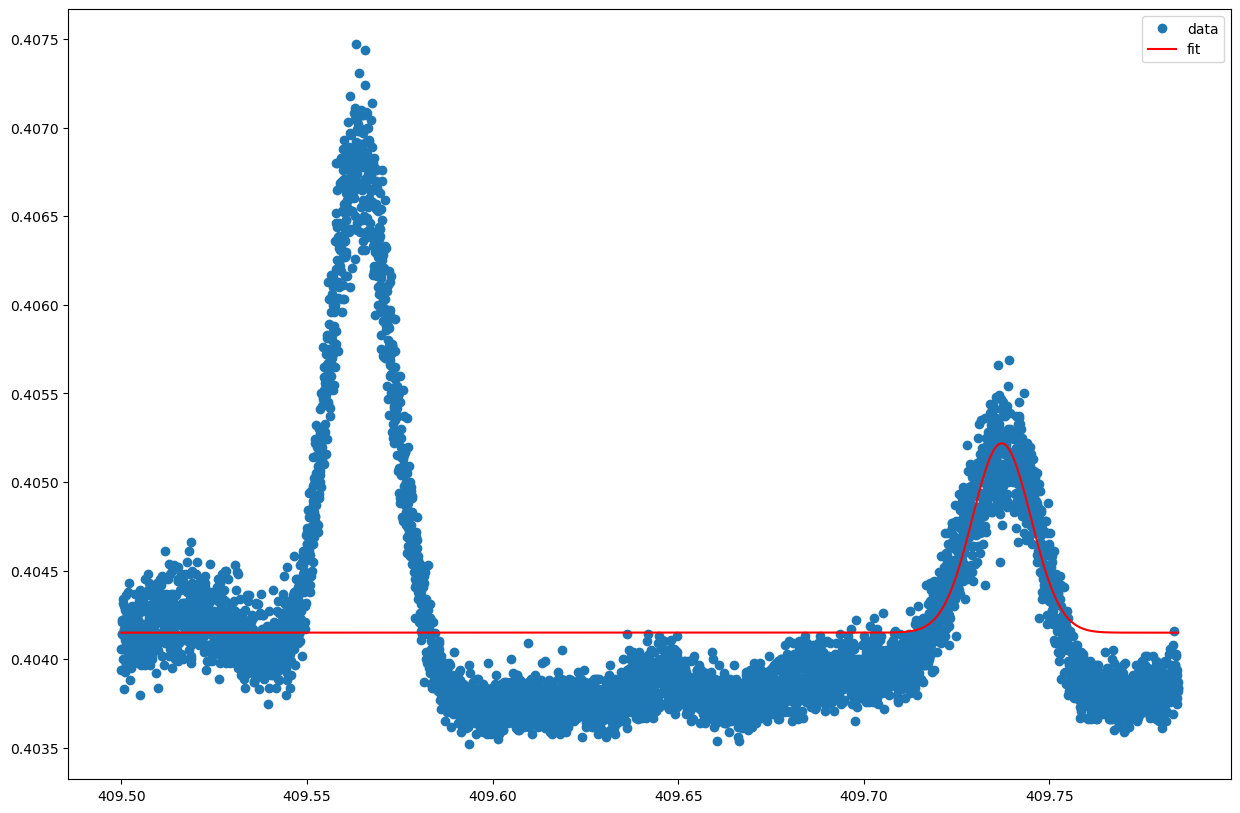

In [4]:
########################
# Input constant values
########################

a_D2 = 0.001 # amplitude                   
mean_D2 = 409.75 # middle of graph                 
h_D2 = .403 # vertical shift                  
sigma_D2 = 0.025 # width displacement


################################
# Define the Gaussian function
# takes in constants, solves 
# equation, returns value
################################

def gaus(x_D2, a_D2, mean_D2, sigma_D2, h_D2):
    fit = a_D2*np.exp((-(x_H2D2-mean_D2)**2)/(2*sigma_D2**2)) + h_D2
    return fit


#####################
# Fit the data using
# curve fit class
#####################

popt_D2, pcov_D2 = curve_fit(gaus, x_H2D2, y_H2D2, p0=[a_D2, mean_D2, sigma_D2, h_D2]) # solves for a, mean, sigma, h
y_D2_fit = gaus(x_H2D2, *popt_D2) # creates y(x) = gaus function with fitted values


#################
# Plot Fit Curve
#################

plt.figure(figsize=(15,10))
plt.plot(x_H2D2, y_H2D2, 'o', label="data")
plt.plot(x_H2D2, y_D2_fit, 'r-', label='fit')
plt.legend()
plt.show()

In [5]:
#####################
# Print fit data
# Print uncertainty
#####################
print("Fit Amplitude: ", popt_D2[0],
      "\n Fit Mean (Wavelength): ", popt_D2[1],
      "\n Fit Sigma (distance from mean to sides): ", popt_D2[2],
      "\n Fit Height: ", popt_D2[3])

print("\n Uncertainty matrix (uncertainties lie along diagonal): \n", pcov_D2)

Fit Amplitude:  0.0010684658991912592 
 Fit Mean (Wavelength):  409.7371194739568 
 Fit Sigma (distance from mean to sides):  0.007871866893737586 
 Fit Height:  0.4041499023378396

 Uncertainty matrix (uncertainties lie along diagonal): 
 [[ 2.37955329e-09  8.89415533e-12 -1.08154662e-08 -6.32703816e-11]
 [ 8.89415533e-12  1.69193184e-07 -6.55666924e-11 -1.69196496e-17]
 [-1.08154662e-08 -6.55666924e-11  1.78919231e-07 -9.32880881e-10]
 [-6.32703816e-11 -1.69196496e-17 -9.32880881e-10  8.94777897e-11]]
